# **Project: Multilabel Text Classification**
**Họ và tên: Võ Phan Anh Quân**

# **Phần I: Mô tả project**

**Multilabel Text Classification** là một bài toán trong Machine Learning liên quan đến việc phân loại văn bản trên nhiều class khác nhau. Với bài phân loại văn bản cơ bản, một mẫu dữ liệu sẽ được gán nhãn chỉ bằng 1 class duy nhất (Multiclass Text Classification). Tuy nhiên với trường hợp của Multilabel, một văn bản sẽ được gán nhãn với n class (n là số class của bài toán) thông qua việc gán giá trị 0, 1 (tương ứng với **có** hoặc **không có**) với từng vị trí của class trong nhãn.

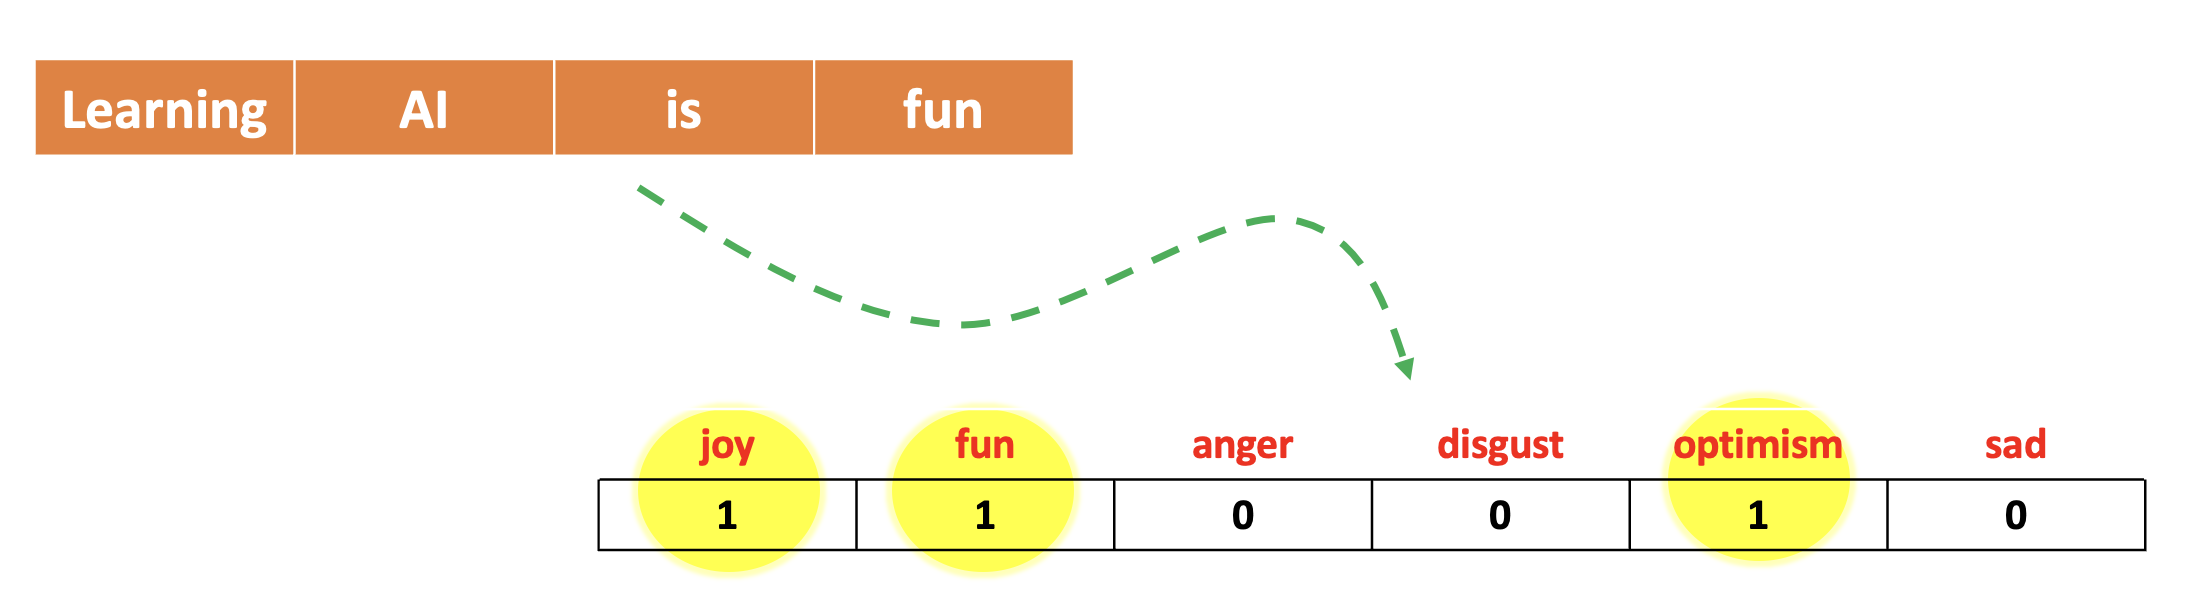

Như vậy, **Input/Output của bài toán sẽ là**:
* **Input:** Một đoạn văn bản (string).
* **Output:** Vector $n$ phần tử $($gồm các số thực có giá trị thuộc khoảng $(0, 1))$.

Ở project này, chúng ta sẽ cùng thực hành giải quyết một bài toán về Multilabel Text Classification thông qua bài Multilabel Sentiment Analysis. Trong đó, nhiệm vụ của ta là cần dự đoán các nhãn có trong một dòng Tweet.

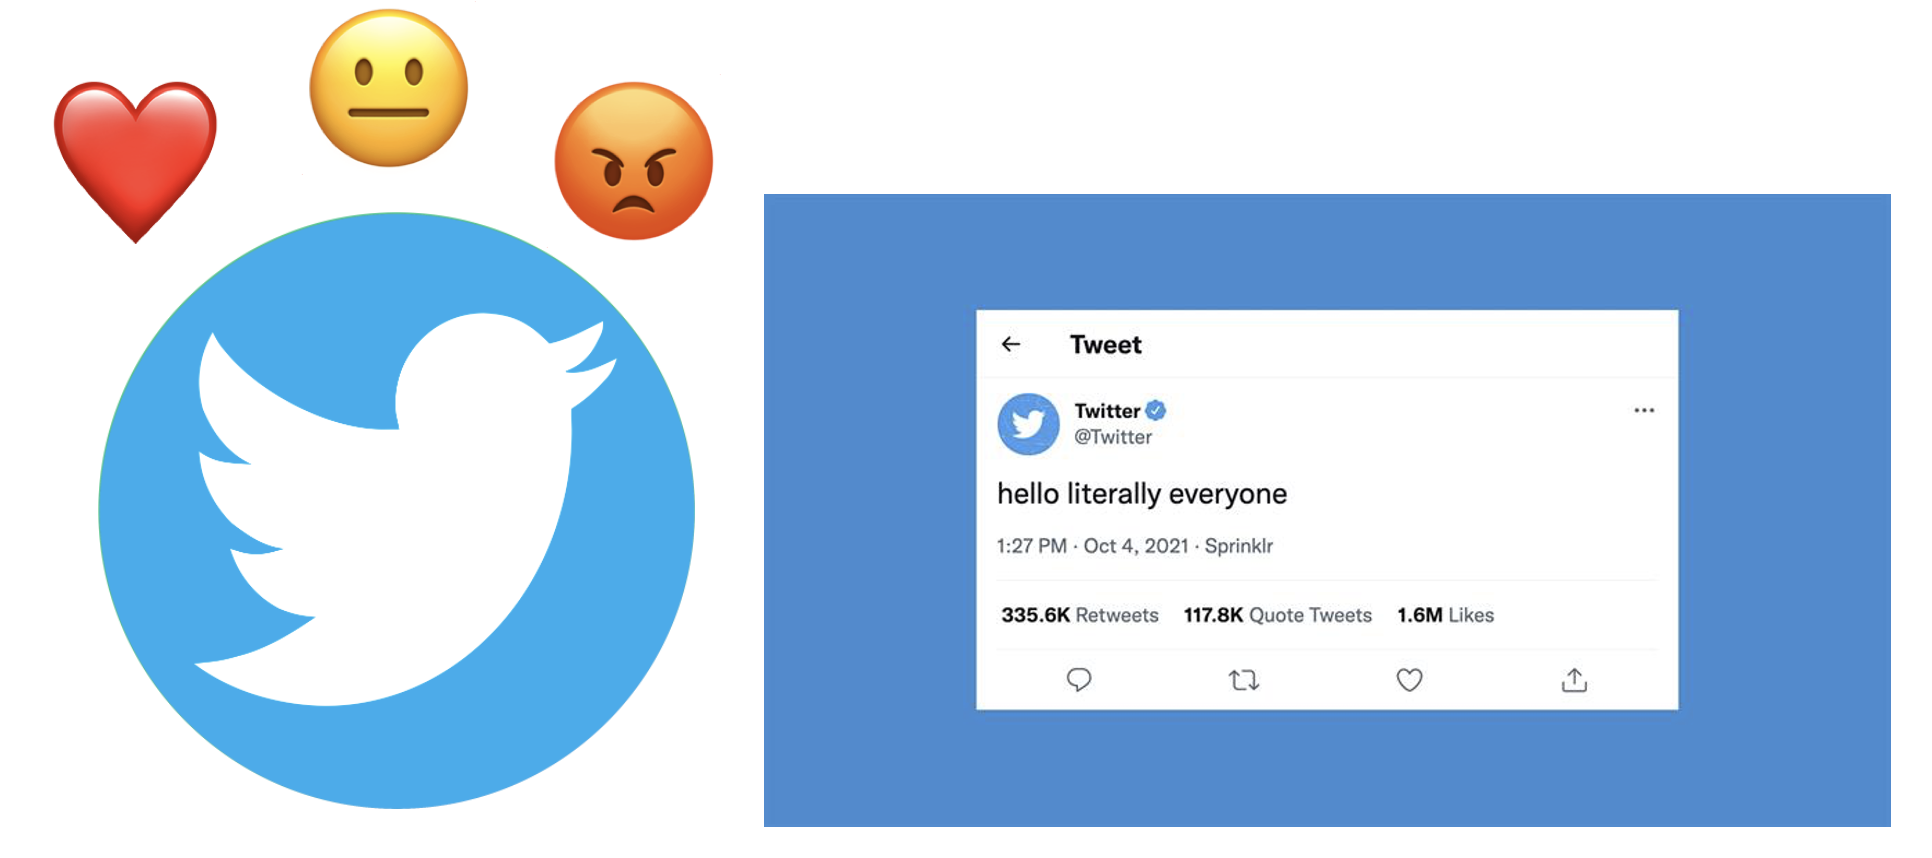

# **Phần II: Multilabel Text Classification**

Trong phần này, chúng ta sẽ xây dựng một mô hình Multilabel Text Classification cơ bản bằng Tensorflow sử dụng một số mạng nơ-ron đã học ở bài trước. Tổng quan về toàn bộ quy trình của project sẽ thực hiện theo như hình dưới đây:

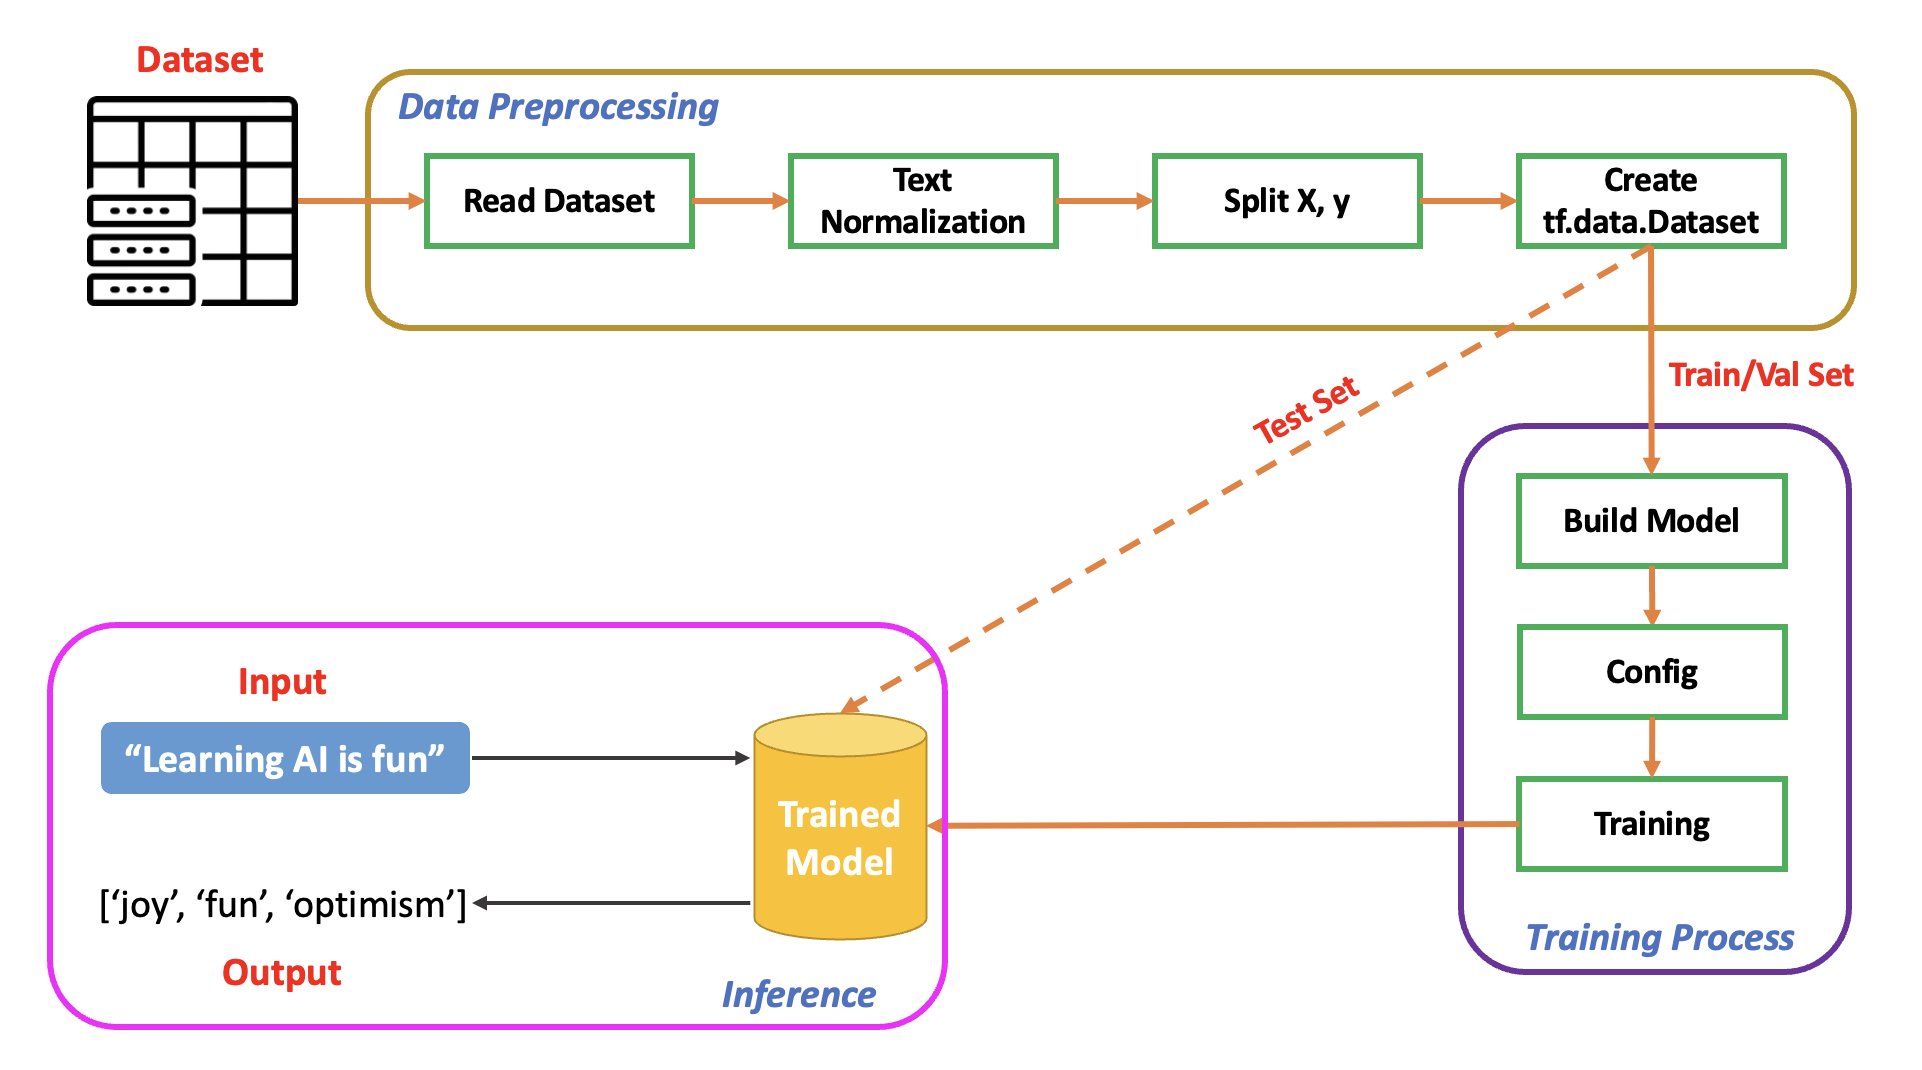

**Các bước thực hiện bao gồm:**

## **1. Tải bộ dữ liệu**

Các bạn tải bộ dữ liệu Multilabel Sentiment Analaysis (SemEval-2018 Task 1)
tại [đây](https://drive.google.com/file/d/1f7WAwkuTFgLzCCTs2HZv3AmtBkET4l1M/view) đã được chia sẵn 3 bộ train/val/test dưới dạng các file csv. Sau đây là thông tin 5 hàng đầu tiên của bảng dữ liệu tập **train.csv**:

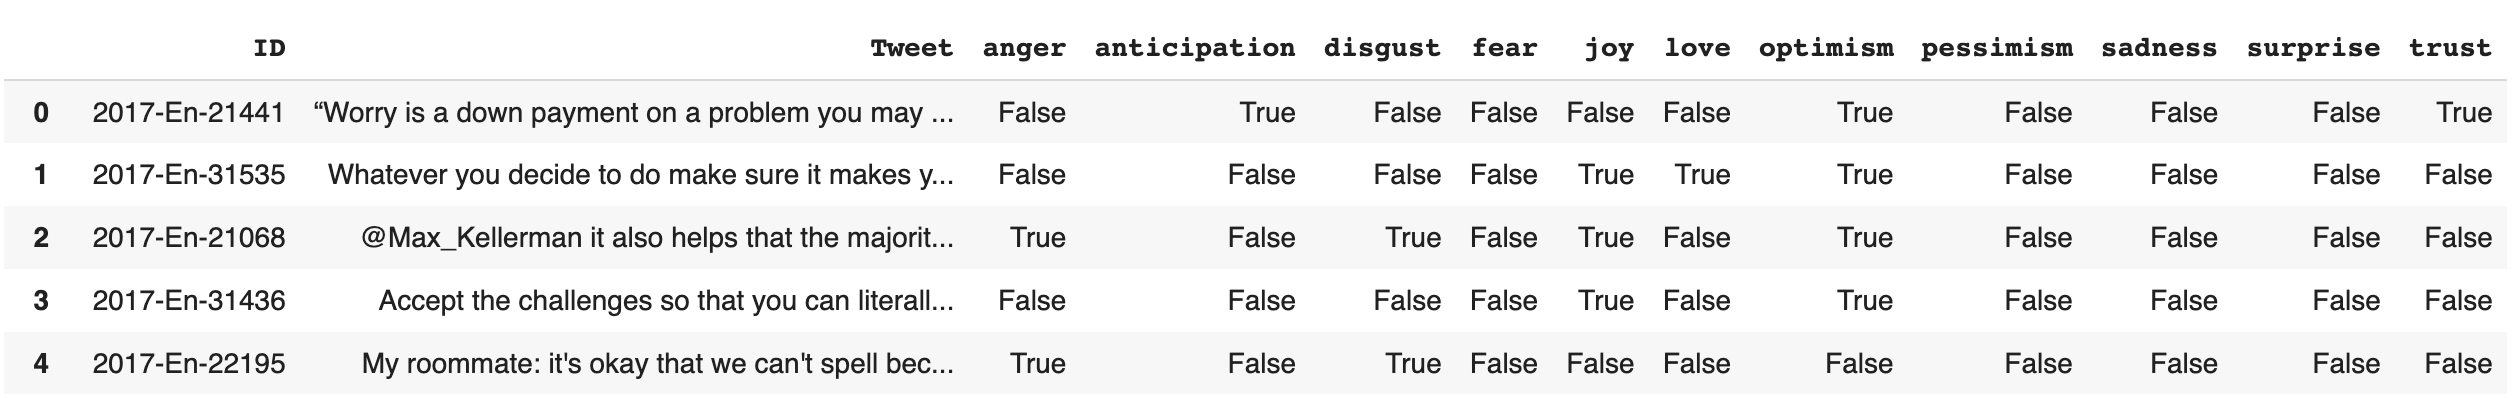

Dựa vào đây, có thể dễ dàng nhận thấy bộ dữ liệu của chúng ta có tổng cộng 11 class, bao gồm: **anger, anticipation, digust, fear, joy, love, optimism, pessimism, sadness, surprise, trust**. So với dữ liệu cho bài Multiclass Classification, các mẫu dữ liệu trong bộ dữ liệu Multilabel Classification đều sẽ được gán nhãn ở tất cả các nhãn có trong bộ dữ liệu [ở đây sẽ gán theo format có (True) hoặc không (False)].

## **2. Chuẩn bị dữ liệu**

Với bộ dữ liệu đã tải về, chúng ta sẽ thực hiện qua một số các công đoạn để
chuyển đổi từ các file .csv thành các tf.data.Dataset (các bạn đọc thêm về Module này tại [đây](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)). Các bước thực hiện như sau:

### **(a) Đọc dữ liệu**

Đầu tiên, đọc các file .csv thành các DataFrame sử dụng thư viện pandas:

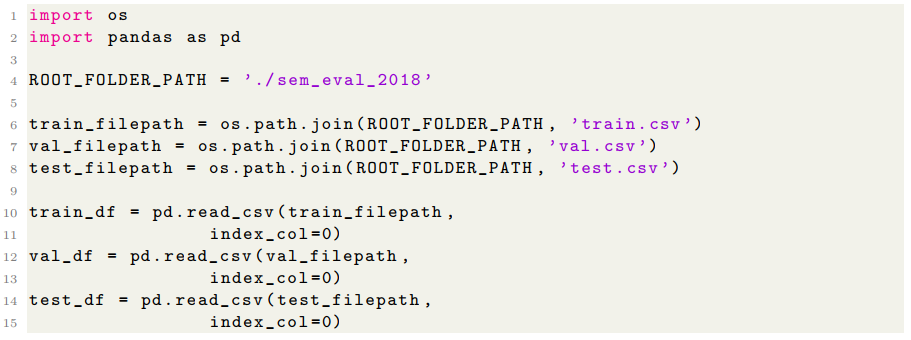

Dựa vào DataFrame, ta có thể xác định được số lượng các class có trong dataset cũng như tổng số lượng mẫu dữ liệu thông qua các dòng lệnh sau:

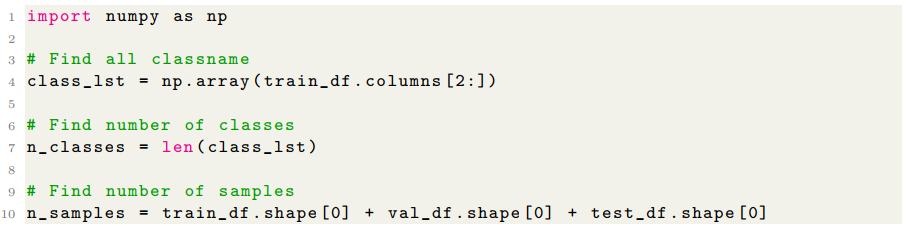

### **(b) Chuẩn hóa dữ liệu**

Để giảm bớt độ phức tạp của các dòng Tweet, ta sẽ thực hiện chuẩn hóa dữ liệu sử dụng một vài các phương pháp chuẩn hóa dữ liệu văn bản đã học. Các phương
pháp được áp dụng trong project bao gồm:
* Chuyển chữ viết thường (Lowercasing).
* Unidecode.
* Xóa dấu câu (Punctuation Removal).
* Xóa stopwords (Stopwords Removal).
* Stemming

Đầu tiên, ta khai báo một hàm nhận đầu vào một string, bên trong triển khai áp dụng các kỹ thuật chuẩn hóa đã liệt kê như trên và cuối cùng sẽ trả về kết quả văn bản đã được chuẩn hóa:

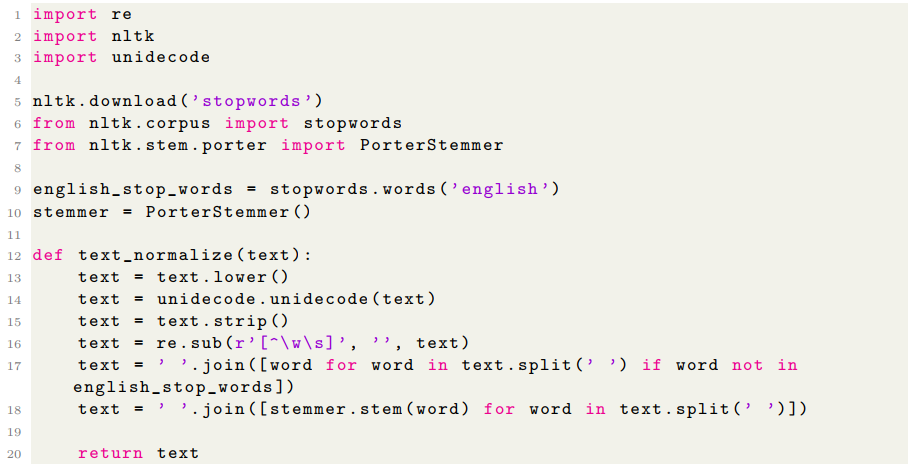

Sau đó, thực hiện áp dụng hàm này lên cột Tweet trong bảng dữ liệu để thực hiện chuẩn hóa dữ liệu áp dụng phương thức **apply()** (các bạn đọc thêm về phương thức này tại [đây](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)) của DataFrame:

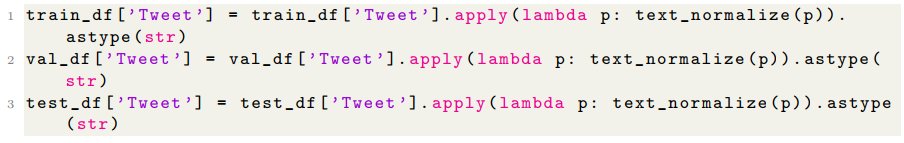

Khi đã áp dụng các phương pháp chuẩn hóa trên, các dòng Tweet lúc này sẽ có dạng như sau:

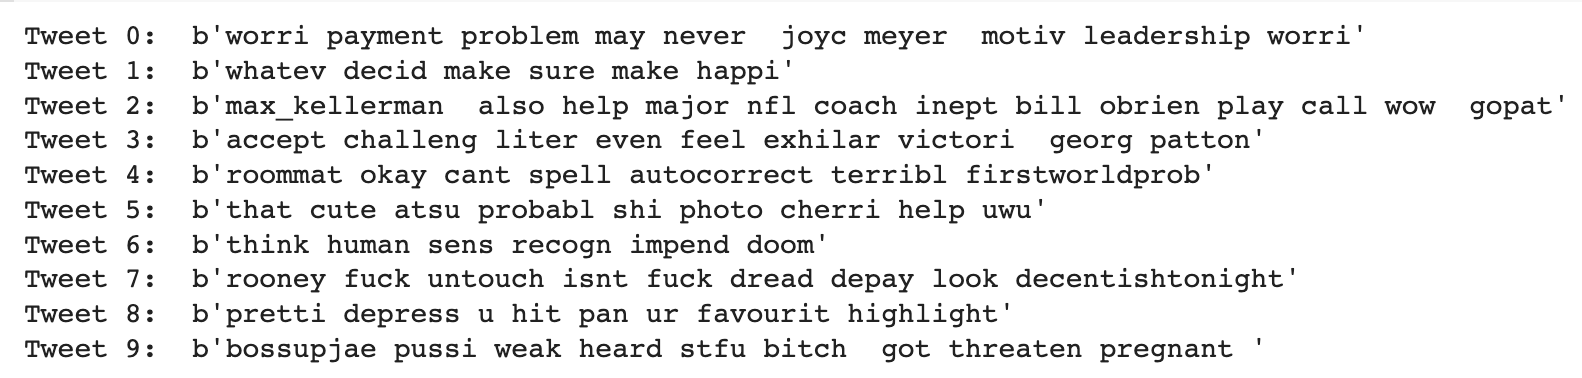

### **(c) Tách DataFrame thành bộ (X, y)**

Để có thể đưa vào huấn luyện, ta cần chuyển đổi các DataFrame thành cặp X, y. Trong bài này, X sẽ là các dòng tweet và y sẽ là một vector chứa nhãn cho các class. Để tách X, ta đơn giản chọn tất cả các giá trị trong cột Tweet.

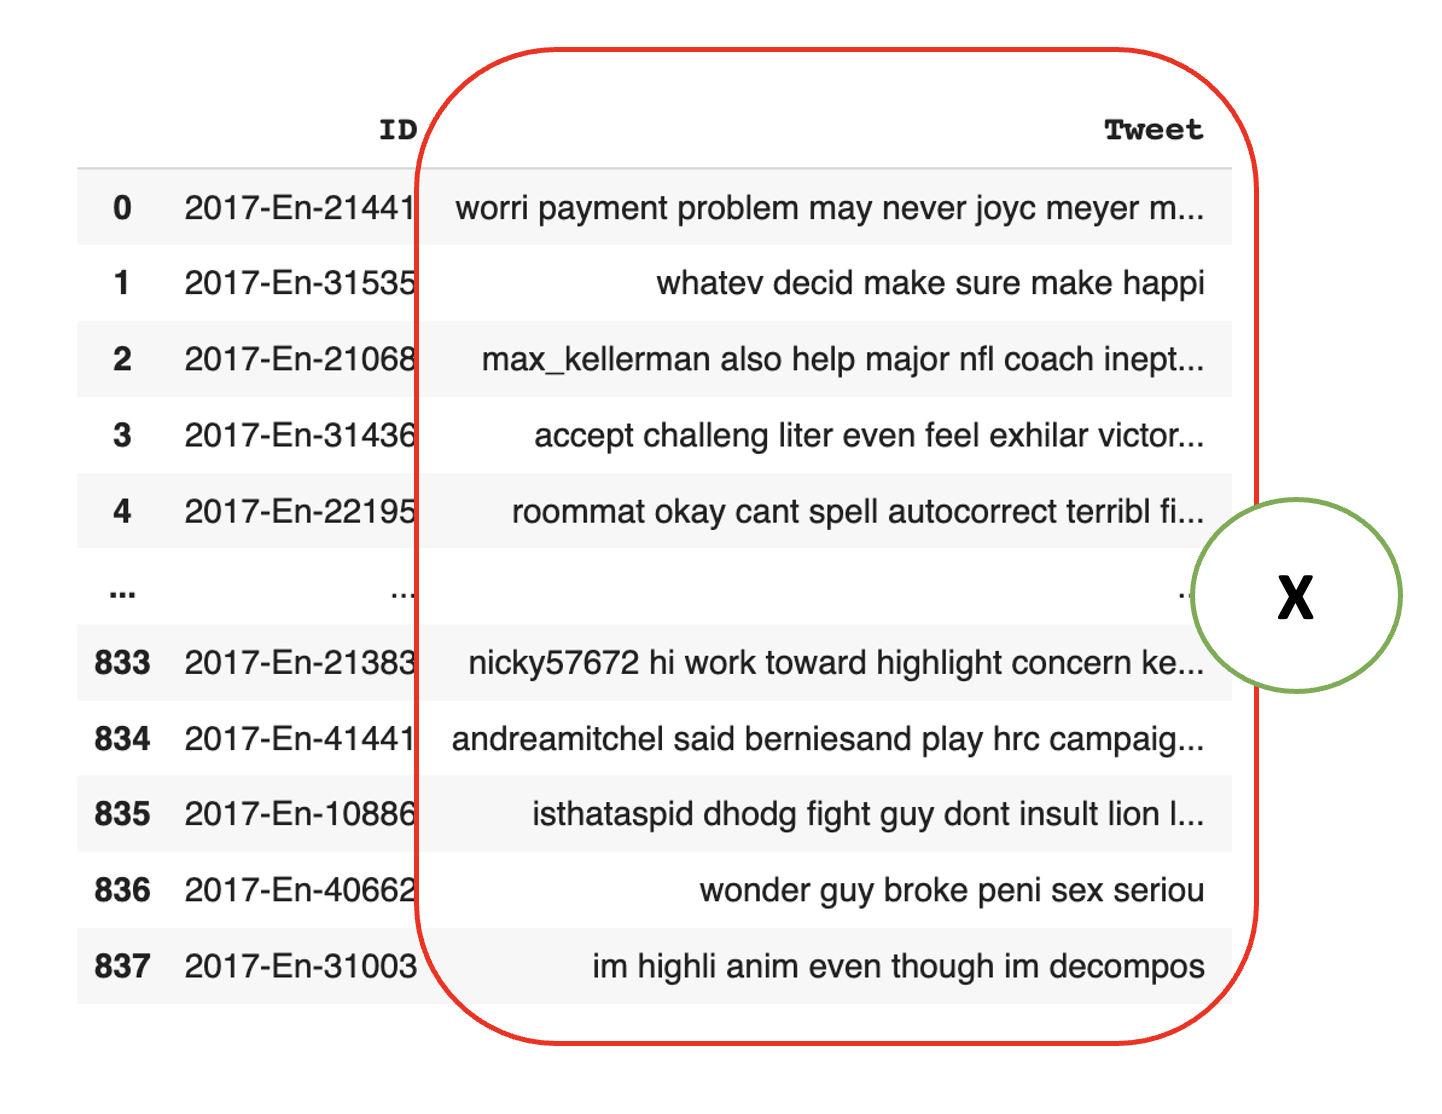

Để tách y, ta chọn giá trị của tất cả các hàng được quy ước là nhãn trong bộ dữ liệu, chuyển đổi kiểu biểu diễn giá trị bool (từ dạng True False thành số nguyên 0 1) và đặt chúng thành một vector.

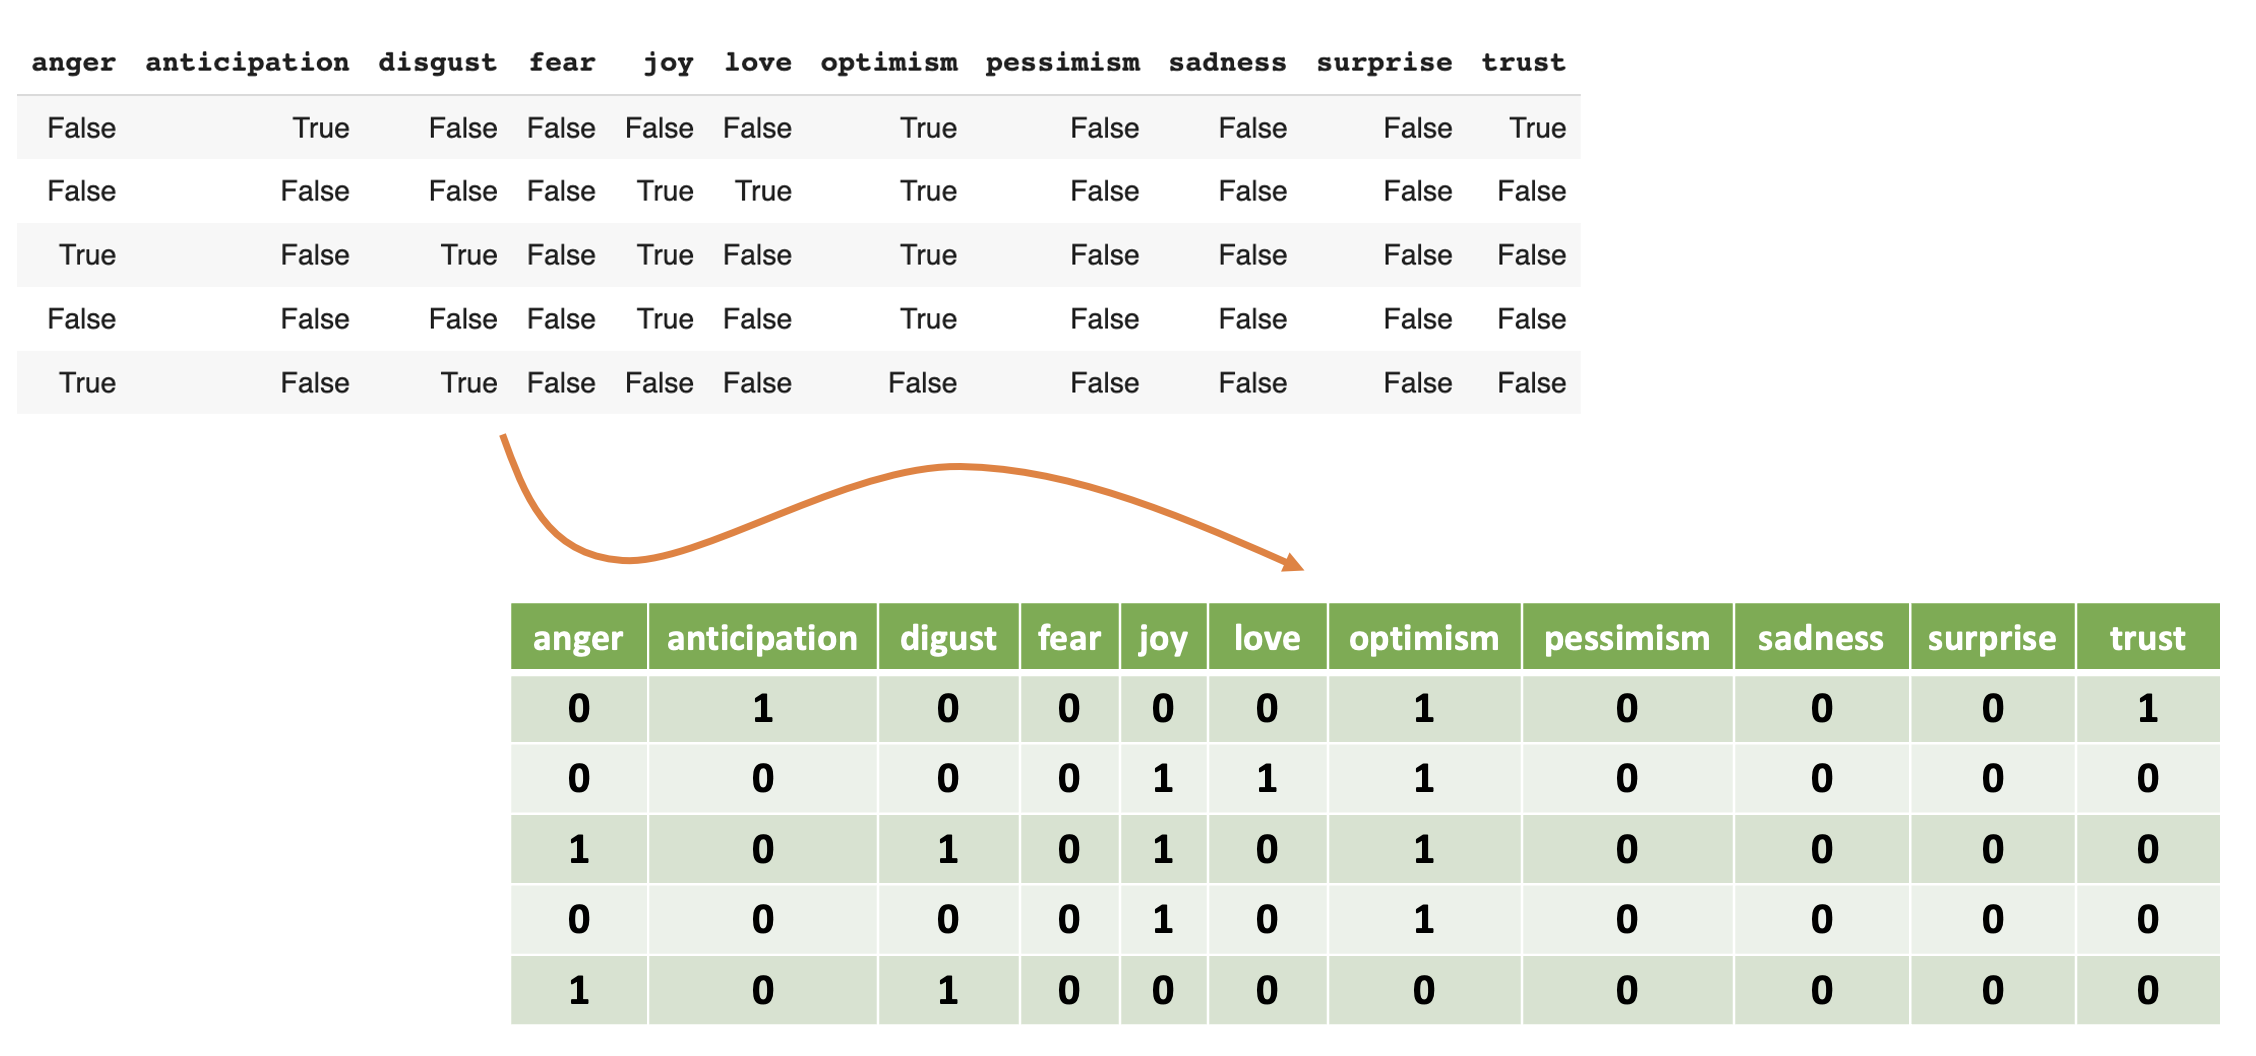

Tổng hợp lại các ý tưởng trên, ta sẽ có đoạn lệnh tách X, y cho ba bộ train/val/test như sau:

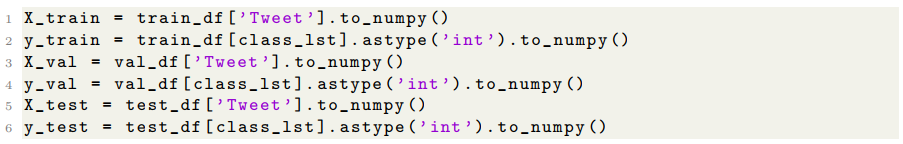

### **(d) Chuyển đổi tf.data.Dataset**

Với các cặp X, y vừa tạo được ở bước trên, ta thực hiện chuyển đổi chúng thành các **tf.data.Dataset** để thuận tiện hơn trong việc huấn luyện mô hình với Tensorflow. Để giải quyết vấn đề này, ta sử dụng hàm **from_tensor_slices()** (các bạn đọc thêm về hàm này tại [đây](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices)):

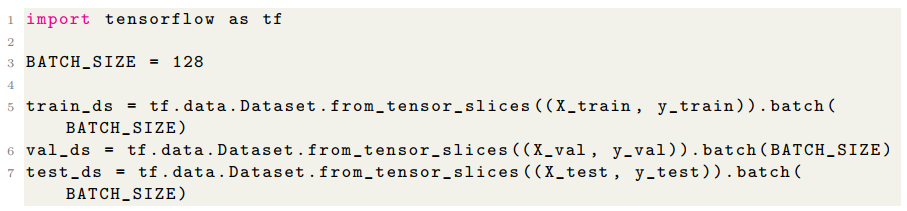

## **3. Xây dựng mô hình**

Các bạn sẽ xây dựng mô hình theo kiến trúc được mô tả như sau (danh sách dưới đây mô tả theo thứ tự trong **tf.keras.Sequential**):

* **Input Layer:** Nhận vào một vector với kiểu dữ liệu là 'string'. (Shape = (1,)).
* **Text Vectorization Layer:** Từ chuỗi đầu vào, thực hiện vector hóa văn bản sử dụng layer **tf.keras.layers.TextVectorization** (các bạn đọc thêm về hàm này tại [đây](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization)) được định nghĩa bên ngoài hàm như sau:
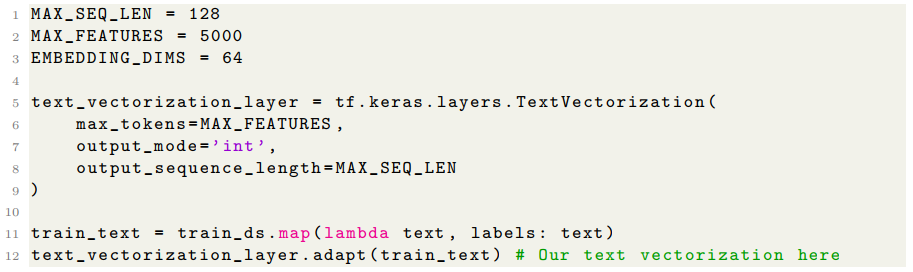
  * Trong đó:
    * **MAX_FEATURES:** Tổng số lượng từ sẽ biểu diễn trong bộ từ vựng (mặc định chọn là 5000).
    * **MAX_SEQ_LEN:** Tổng số token biểu diễn cho 1 câu (mặc định chọn là 128).

* **Embedding Layer:** Từ vector output của text vectorization layer, ta đưa vào layer embedding. Chức năng chính của layer này là để biểu diễn các phần tử số nguyên trong vector đầu vào thành các vector với cùng chiều dài (**embedding dims**).
* **BiLSTM Layer 1:** Từ vector output của embedding layer, ta đưa vào layer BiLSTM đầu tiên với **64 units**. Lưu ý rằng cần phải trả về vector output của toàn bộ timestep tại layer này để có thể làm input của layer BiLSTM tiếp theo.
* **BiLSTM Layer 2:** Layer BiLSTM thứ 2 với **64 units**, trả về hidden state của toàn bộ timestep.
* **BiLSTM Layer 3:** Layer BiLSTM cuối cùng với **64 units**, với layer này ta sẽ chỉ trả về vector output tại timestep cuối cùng.
* **Dropout Layer 1:** Layer Dropout với tỉ lệ **drop = 0.2**.
* **Fully-connected Layer 1:** Từ vector output của RNN layer cuối cùng, ta đưa vào một lớp fully-connected layer thứ nhất với **64 node** với activation function là **'relu'**.
* **Dropout Layer 2:** Layer Dropout với tỉ lệ **drop = 0.3**.
* **Fully-connected Layer 2:** Lớp fully-connected layer thứ hai với **32 node** với activation function là **'relu'**.
* **Dropout Layer 3:** Layer Dropout với tỉ lệ **drop = 0.3**.
* **Output Layer:** Fully-connected layer với **11 nodes** (tượng trưng cho 11 class) và activation function là **'sigmoid'**.

Sau khi xây dựng xong hàm này, thực hiện lời gọi hàm với tên biến là **model**:

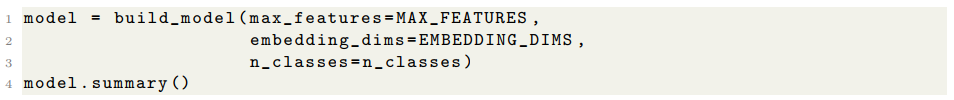

## **4. Cài đặt các tham số khác cho mô hình**

Sau khi có mô hình, ta cần cấu hình thêm một số thông tin cơ bản khác cho model bao gồm hàm loss, thuật toán tối ưu, độ đo đánh giá... Các bạn sẽ chỉnh theo danh sách như sau:
* **Loss function:** Binary CrossEntropy.
* **Optimizer:** Adam.
* **Metrics:** Accuracy.

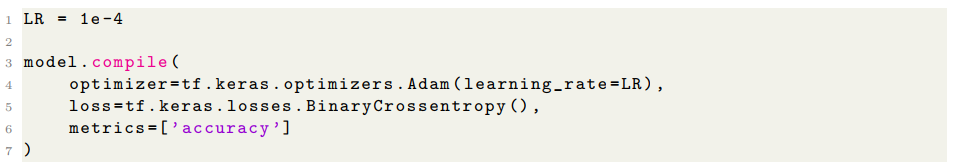


## **5. Thực hiện huấn luyện** 

Thực hiện huấn luyện mô hình trên dữ liệu train và đánh giá trên tập val.

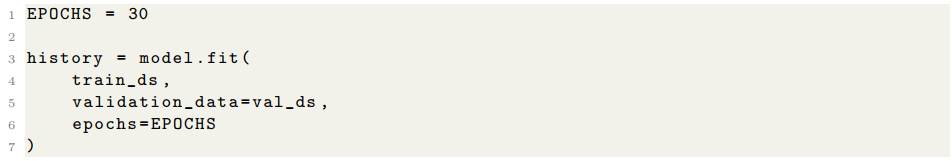

## **6. Đánh giá, trực quan hóa và inference**

Với mô hình đã huấn luyện xong, ta có thể thực hiện:
* **Đánh giá trên tập dữ liệu test:** Bên cạnh bộ val, ta sẽ đánh giá mô hình thêm 1 lần nữa trên tập test.
image.png
Sau khi chạy lệnh trên, kết quả sẽ được hiện ra thông qua các độ đo đánh giá (loss, accuracy)
* **Inference:** Với output là một vector n phần tử có giá trị thuộc khoảng (0, 1) đại diện cho xác suất xuất hiện của các class tương ứng trong sample cho trước. Với output này, ta sẽ xác định được tên các class cụ thể mà model xác định được thông qua việc thresholding. Theo đó, ta chọn một giá trị ngưỡng **threshold** (mặc định **threshold = 0.5**), sau đó duyệt qua từng phần tử trong vector output, nếu giá trị của phần tử đó > threshold thì ta chuyển nó thành 1 và ngược lại sẽ thành 0.

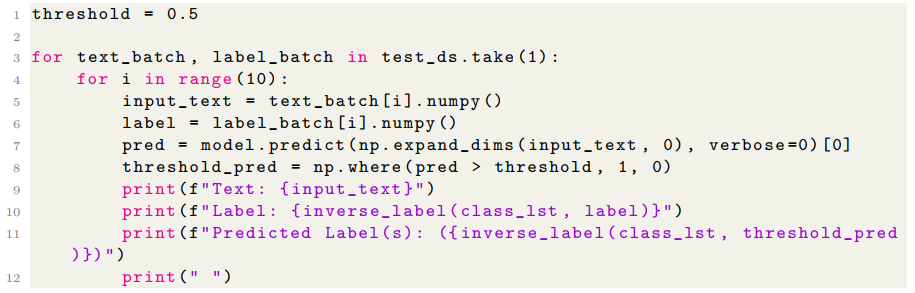

* **Trực quan hóa kết quả huấn luyện:** Ta có thể trực quan hiệu năng của mô hình trong quá trình học thông qua việc vẽ đồ thị loss và accuracy trên tập train và val trong quá trình huấn luyện.

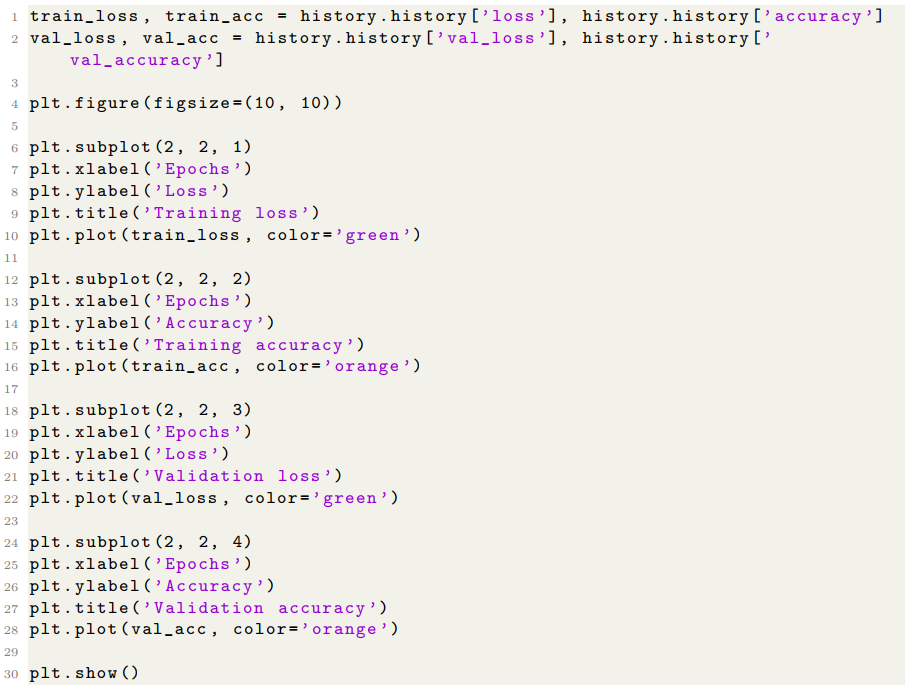

## **IMPLEMENT**

In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 5.3 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
RANDOM_SEED = 1
tf.random.set_seed(RANDOM_SEED)

In [ ]:
!gdown --id 1f7WAwkuTFgLzCCTs2HZv3AmtBkET4l1M

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1f7WAwkuTFgLzCCTs2HZv3AmtBkET4l1M
To: /content/sem_eval_2018.zip
100% 662k/662k [00:00<00:00, 115MB/s]


In [ ]:
!unzip './sem_eval_2018.zip'

Archive:  ./sem_eval_2018.zip
   creating: sem_eval_2018/
  inflating: sem_eval_2018/val.csv   
  inflating: sem_eval_2018/test.csv  
  inflating: sem_eval_2018/train.csv  


In [ ]:
ROOT_FOLDER_PATH = './sem_eval_2018'

train_filepath = os.path.join(ROOT_FOLDER_PATH, 'train.csv')
val_filepath = os.path.join(ROOT_FOLDER_PATH, 'val.csv')
test_filepath = os.path.join(ROOT_FOLDER_PATH, 'test.csv')

train_df = pd.read_csv(train_filepath, index_col= 0)
val_df = pd.read_csv(val_filepath, index_col= 0)
test_df = pd.read_csv(test_filepath, index_col= 0)

class_lst = np.array(train_df.columns[2:])
n_classes = len(class_lst)
n_samples = train_df.shape[0] + val_df.shape[0] + test_df.shape[0]

In [ ]:
import re
import nltk
import unidecode

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

english_stop_words = stopwords.words('english')
stemmer = PorterStemmer()

def text_normalize(text):
    text = text.lower()
    text = unidecode.unidecode(text)
    text = text.strip()
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join([word for word in text.split(' ') if word not in english_stop_words])
    text = ' '.join([stemmer.stem(word) for word in text.split(' ')])

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_df['Tweet'] = train_df['Tweet'].apply(lambda p: text_normalize(p)).astype(str)
val_df['Tweet'] = val_df['Tweet'].apply(lambda p: text_normalize(p)).astype(str)
test_df['Tweet'] = test_df['Tweet'].apply(lambda p: text_normalize(p)).astype(str)

X_train = train_df['Tweet'].to_numpy()
y_train = train_df[class_lst].astype('int').to_numpy()

X_val = val_df['Tweet'].to_numpy()
y_val = val_df[class_lst].astype('int').to_numpy()

X_test = test_df['Tweet'].to_numpy()
y_test = test_df[class_lst].astype('int').to_numpy()

In [ ]:
BATCH_SIZE = 128
MAX_SEQ_LEN = 128
MAX_FEATURES = 5000
EMBEDDING_DIMS = 64

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE)

In [ ]:
def inverse_label(class_lst, onehot_label):
    return class_lst[onehot_label > 0]

for text_batch, label_batch in train_ds.take(1):
  for i in range(10):
    print("Text: ", text_batch.numpy()[i])
    print("Label:", inverse_label(class_lst, label_batch.numpy()[i]))

Text:  b'worri payment problem may never  joyc meyer  motiv leadership worri'
Label: ['anticipation' 'optimism' 'trust']
Text:  b'whatev decid make sure make happi'
Label: ['joy' 'love' 'optimism']
Text:  b'max_kellerman  also help major nfl coach inept bill obrien play call wow  gopat'
Label: ['anger' 'disgust' 'joy' 'optimism']
Text:  b'accept challeng liter even feel exhilar victori  georg patton'
Label: ['joy' 'optimism']
Text:  b'roommat okay cant spell autocorrect terribl firstworldprob'
Label: ['anger' 'disgust']
Text:  b'that cute atsu probabl shi photo cherri help uwu'
Label: ['joy']
Text:  b'think human sens recogn impend doom'
Label: ['anticipation' 'pessimism']
Text:  b'rooney fuck untouch isnt fuck dread depay look decentishtonight'
Label: ['anger' 'disgust']
Text:  b'pretti depress u hit pan ur favourit highlight'
Label: ['disgust' 'sadness']
Text:  b'bossupjae pussi weak heard stfu bitch  got threaten pregnant '
Label: ['anger' 'disgust']


In [ ]:
# Cấu hình các tham số tối ưu cho việc đọc dữ liệu
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
text_vectorization_layer = tf.keras.layers.TextVectorization(
    max_tokens=MAX_FEATURES,
    output_mode='int',
    output_sequence_length=MAX_SEQ_LEN
)

train_text = train_ds.map(lambda text, labels: text)
text_vectorization_layer.adapt(train_text)

In [ ]:
def build_model(max_features, max_seq_len, embedding_dims, n_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape= (1,), dtype= 'string', name='input_layer'),

        text_vectorization_layer,
        tf.keras.layers.Embedding(input_dim= max_features+1, 
                                  output_dim= embedding_dims, 
                                  embeddings_initializer=tf.random_uniform_initializer(seed=RANDOM_SEED),
                                  mask_zero= True,
                                  name='embedding_layer'),

        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,
                                    return_sequences=True,
                                    kernel_initializer= tf.initializers.GlorotUniform(seed=RANDOM_SEED)),
                                    name='bi_lstm_layer_1'),

        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,
                                    return_sequences=True,
                                    kernel_initializer= tf.initializers.GlorotUniform(seed=RANDOM_SEED)),
                                    name='bi_lstm_layer_2'),

        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,
                                    return_sequences=False,
                                    kernel_initializer= tf.initializers.GlorotUniform(seed=RANDOM_SEED)),
                                    name='bi_lstm_layer_3'),    

        tf.keras.layers.Dropout(0.2, name='dropout_layer_1'),

        tf.keras.layers.Dense(64,
                            activation='relu',
                            kernel_initializer= tf.initializers.GlorotUniform(seed=RANDOM_SEED),
                            name='dense_layer_1'),  

        tf.keras.layers.Dropout(0.3, name='dropout_layer_2'),

        tf.keras.layers.Dense(32,
                            activation='relu',
                            kernel_initializer= tf.initializers.GlorotUniform(seed=RANDOM_SEED),
                            name='dense_layer_2'),

        tf.keras.layers.Dropout(0.3, name='dropout_layer_3'),

        tf.keras.layers.Dense(n_classes,
                            activation='sigmoid',
                            kernel_initializer= tf.initializers.GlorotUniform(seed=RANDOM_SEED),
                            name='output_layer'),                                                                                                                                  
    ], name='biLSTM_model')

    return model

In [ ]:
model = build_model(max_features=MAX_FEATURES, 
                    max_seq_len=MAX_SEQ_LEN,
                    embedding_dims=EMBEDDING_DIMS, 
                    n_classes=n_classes)
model.summary()

Model: "biLSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 128)              0         
 torization)                                                     
                                                                 
 embedding_layer (Embedding)  (None, 128, 64)          320064    
                                                                 
 bi_lstm_layer_1 (Bidirectio  (None, 128, 128)         66048     
 nal)                                                            
                                                                 
 bi_lstm_layer_2 (Bidirectio  (None, 128, 128)         98816     
 nal)                                                            
                                                                 
 bi_lstm_layer_3 (Bidirectio  (None, 128)              98816     
 nal)                                                 

In [ ]:
EPOCHS = 30
LR = 1e-4

In [ ]:
# Cấu hình một số thông tin cho mô hình
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR), # Sử dụng optimizer Adam
    loss=tf.keras.losses.BinaryCrossentropy(), # Sử dụng hàm loss BinaryCrossEntropy
    metrics=['accuracy'] # Sử dụng thêm độ đo đánh giá Accuracy
)

In [ ]:
# Thực hiện huấn luyện
history = model.fit( 
    train_ds, # Huấn luyện với bộ train_ds
    validation_data=val_ds, # Đánh giá trên bộ val_ds
    epochs=EPOCHS # Huấn luyện với số lần lặp = số epochs
)

Epoch 1/30
54/54 [==============================] - 43s 280ms/step - loss: 0.6830 - accuracy: 0.0899 - val_loss: 0.6563 - val_accuracy: 0.0621
Epoch 2/30
54/54 [==============================] - 2s 40ms/step - loss: 0.6034 - accuracy: 0.0889 - val_loss: 0.5424 - val_accuracy: 0.0621
Epoch 3/30
54/54 [==============================] - 2s 40ms/step - loss: 0.5619 - accuracy: 0.1319 - val_loss: 0.5203 - val_accuracy: 0.0621
Epoch 4/30
54/54 [==============================] - 2s 39ms/step - loss: 0.5463 - accuracy: 0.1367 - val_loss: 0.5069 - val_accuracy: 0.0621
Epoch 5/30
54/54 [==============================] - 2s 39ms/step - loss: 0.5351 - accuracy: 0.1502 - val_loss: 0.4995 - val_accuracy: 0.0621
Epoch 6/30
54/54 [==============================] - 2s 40ms/step - loss: 0.5258 - accuracy: 0.1531 - val_loss: 0.4931 - val_accuracy: 0.0621
Epoch 7/30
54/54 [==============================] - 2s 42ms/step - loss: 0.5199 - accuracy: 0.1502 - val_loss: 0.4903 - val_accuracy: 0.0621
Epoch 8/30


In [ ]:
# Đánh giá mô hình trên tập test
test_evaluation = model.evaluate(test_ds)

26/26 [==============================] - 1s 20ms/step - loss: 0.4419 - accuracy: 0.4511


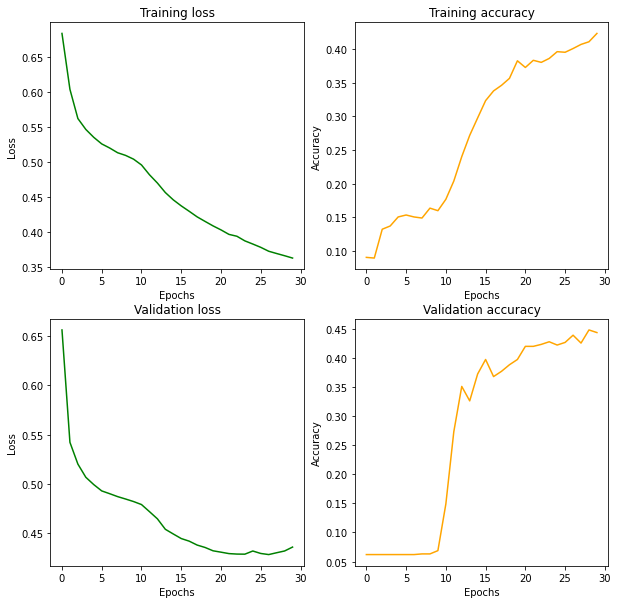

In [ ]:
# Đọc các kết quả huấn luyện mô hình qua từng epoch
train_loss, train_acc = history.history['loss'], history.history['accuracy'] # Đọc thông tin loss, acc trên tập train
val_loss, val_acc = history.history['val_loss'], history.history['val_accuracy'] # Đọc thông tin loss, acc trên tập val

plt.figure(figsize=(10, 10)) # Cài đặt kích thước khung ảnh

plt.subplot(2, 2, 1) # Khởi tạo khung ảnh cho training loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Training loss') # Hiển thị title của khung ảnh hiện tại là 'Training Loss'
plt.plot(train_loss, color='green') # Vẽ đường giá trị loss trên tập train qua từng epoch (đường vẽ màu đỏ)

plt.subplot(2, 2, 2) # Khởi tạo khung ảnh cho training acc
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Accuracy') # Hiển thị tên trục tung là 'Accuracy'
plt.title('Training accuracy') # Hiển thị title của khung ảnh hiện tại là 'Training accuracy'
plt.plot(train_acc, color='orange') # Vẽ đường giá trị accuracy trên tập train qua từng epoch (đường vẽ màu cam)

plt.subplot(2, 2, 3) # Khởi tạo khung ảnh cho val loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Validation loss') # Hiển thị title của khung ảnh hiện tại là 'Validation loss'
plt.plot(val_loss, color='green') # Vẽ đường giá trị loss trên tập val qua từng epoch (đường vẽ màu đỏ)

plt.subplot(2, 2, 4) # Khởi tạo khung ảnh cho val acc
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Accuracy') # Hiển thị tên trục tung là 'Accuracy'
plt.title('Validation accuracy') # Hiển thị title của khung ảnh hiện tại là 'Validation accuracy'
plt.plot(val_acc, color='orange') # Vẽ đường giá trị accuracy trên tập val qua từng epoch (đường vẽ màu cam)

plt.show() # Hiển thị 4 khung ảnh nhỏ

In [ ]:
threshold = 0.4

for text_batch, label_batch in test_ds.take(1):
    for i in range(10):
        input_text = text_batch[i].numpy()
        label = label_batch[i].numpy()
        pred = model.predict(np.expand_dims(input_text, 0), verbose=0)[0]
        threshold_pred = np.where(pred > threshold, 1, 0)
        print(f"Text: {input_text}")
        print(f"Label: {inverse_label(class_lst, label)}")
        print(f"Predicted Label(s): ({inverse_label(class_lst, threshold_pred)})")
        print(" ")

Text: b'adnan__786__ asyounotwish dont worri indian armi way dispatch terrorist hell'
Label: ['anger' 'anticipation' 'optimism' 'trust']
Predicted Label(s): ([])
 
Text: b'academi scienc eschew normal sober tone scientif paper call massiv loss wildlif biolog annihil'
Label: ['disgust']
Predicted Label(s): (['joy' 'optimism'])
 
Text: b'blew opportun __ mad'
Label: ['anger' 'disgust' 'sadness']
Predicted Label(s): ([])
 
Text: b'time 2 week 30'
Label: ['joy' 'sadness']
Predicted Label(s): ([])
 
Text: b'deppress real partner w depress peopl truli dont understand depth affect us add anxieti ampmak wors'
Label: ['fear' 'sadness']
Predicted Label(s): (['anger' 'disgust' 'sadness'])
 
Text: b'politicoeurop interest choic word confirm govern fund terror bit open door still'
Label: ['anger' 'disgust' 'fear' 'pessimism']
Predicted Label(s): (['disgust' 'sadness'])
 
Text: b'ananavarro cnn sure'
Label: ['joy' 'optimism']
Predicted Label(s): (['joy'])
 
Text: b'distanc stretch friend impos serio